### style

In [40]:
%%html
<style>
.container {width: 90% !important; }
#logo
{
    float: left;
}
#names
{
    float: right;
    
}
#logo2
{
    float: right;
    height=100;
    width=100;
    margin: 5px;
}
#top_menu
{
    margin: 20px auto 0;
    
    height:300px;
    width: 400px;
}
</style>

# ArcGIS API for Python: Data Engineering using DataFrames

### ~ Andrew Chapkowski
### @achapkowski (twitter)

# Part 1 Introduction to Pandas

## What is Pandas

<center>
<img src="./img/pandas.gif"/>
</center>

- Pandas is a package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive
- Data feels like excel spreadsheets

## Why use Pandas

- Easy handling of missing data
- Size mutability
- Automatic and explicit data alignment
- Powerful, flexible group by functionality 

### Other Reasons

- Intelligent label-based slicing
- Fancy Indexing and subsetting
- Intuitive merging and joining data sets
- Flexible reshaping and pivoting of data sets

## Getting Started

### Importing the Module

In [41]:
import pandas as pd

### Allowing Graphics to Show in Jupyter Notebook

In [42]:
%matplotlib inline

## Series

- 1 dimensional labeled array
    + Can hold any data type
    
```python
>>> s = pd.Series(data, index=index)
```

#### Creating A Series Example

In [43]:
import numpy as np
data = np.random.randn(5)

In [45]:
# %load solutions/sol1.py
series = pd.Series(data)
series

0    0.316501
1    0.247374
2   -0.196390
3    0.190804
4   -0.322336
dtype: float64

## DataFrame

- 2 dimensional labeled data structure with columns of varying type
    + like a Excel spreadsheet or database table

<img src="./img/structure_table.jpg"/>

#### DataFrame Example

In [46]:
data = [[1,2,3], [3,4,None]]
fields = ['field1', 'field2', 'field3']

In [48]:
# %load solutions/sol2.py
df = pd.DataFrame(data, columns=fields)
df


field1  field2  field3
0       1       2     3.0
1       3       4     NaN

## Pandas Basics

In [49]:
df = pd.read_csv("./data/iris.csv")

### Peeking at Data

- Display only a small portion of data to understand what you have
- You can look at the top and bottom of the data

In [50]:
df.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [51]:
df.tail()

SepalLength  SepalWidth  PetalLength  PetalWidth            Name
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

#### Slicing the DataFrame

- Selecting by index values for various ranges can be provided

In [53]:
# %load solutions/sol3.py
df[23:31:3]


SepalLength  SepalWidth  PetalLength  PetalWidth         Name
23          5.1         3.3          1.7         0.5  Iris-setosa
26          5.0         3.4          1.6         0.4  Iris-setosa
29          4.7         3.2          1.6         0.2  Iris-setosa

### Describing Data

- helps get a sense of data
    + provides the standard deviation, min, max, and break down of values for numeric data
- provides basic statistics of a dataset

In [55]:
# %load solutions/sol4.py
df.describe()


SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000

### Shuffling Data

- When data is loading in order it's a good practice to shuffle it up before sampling.

In [57]:
# %load solutions/sol5.py
df = (df
      .sample(frac=1)
      .reset_index(drop=True))
df.head()


SepalLength  SepalWidth  PetalLength  PetalWidth             Name
0          5.6         2.7          4.2         1.3  Iris-versicolor
1          5.6         2.8          4.9         2.0   Iris-virginica
2          6.9         3.1          5.1         2.3   Iris-virginica
3          4.3         3.0          1.1         0.1      Iris-setosa
4          5.6         2.5          3.9         1.1  Iris-versicolor

### DataFrame Columns

- DataFrames store information about the names and data types(dtypes)

In [58]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

- Accessing the data type information

In [60]:
# %load solutions/sol6.py
df.dtypes


SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object

### Accessing the Data

- Zero based indexing (like most of Python)
- Use `iloc` to access a row
- Use `['<column name>']` to access a column

#### Example Accessing a Single Row

In [62]:
# %load solutions/sol7.py
df.iloc[7]


SepalLength            4.8
SepalWidth               3
PetalLength            1.4
PetalWidth             0.3
Name           Iris-setosa
Name: 7, dtype: object

#### Example Selecting Columns

In [64]:
# %load solutions/sol8.py
df[['SepalLength', 'Name']].head()

SepalLength             Name
0          5.6  Iris-versicolor
1          5.6   Iris-virginica
2          6.9   Iris-virginica
3          4.3      Iris-setosa
4          5.6  Iris-versicolor

#### Example: Accessing a Single Value

In [66]:
# %load solutions/sol9.py
df.Name.iloc[0]

'Iris-versicolor'

### Slicing 

- Slicing like in lists, worlds on the `iloc` method
- Syntax is as follows:

```
    df.iloc[<start index> : <stop index> : <step size>]
```

In [68]:
# %load solutions/sol10.py
df.iloc[1:16:3]

SepalLength  SepalWidth  PetalLength  PetalWidth             Name
1           5.6         2.8          4.9         2.0   Iris-virginica
4           5.6         2.5          3.9         1.1  Iris-versicolor
7           4.8         3.0          1.4         0.3      Iris-setosa
10          6.9         3.1          5.4         2.1   Iris-virginica
13          6.7         3.3          5.7         2.1   Iris-virginica

### Method Chaining

- Calling one method after another

In [70]:
# %load solutions/sol11.py
df = (
    df
    .rename(columns=str.lower)
    .assign(
        name=lambda x: x['name'].str.lower()
    )
)

df.head()

sepallength  sepalwidth  petallength  petalwidth             name
0          5.6         2.7          4.2         1.3  iris-versicolor
1          5.6         2.8          4.9         2.0   iris-virginica
2          6.9         3.1          5.1         2.3   iris-virginica
3          4.3         3.0          1.1         0.1      iris-setosa
4          5.6         2.5          3.9         1.1  iris-versicolor

### Working with Date/Time

- Pandas handles datetime values and creating datatime values pretty use
    + use `pd.to_datetime()`

#### Example: Date/Time Spread Across Many Columns

In [71]:
data = [[12, 25,2017,10], [1,15,2018,11], [3,7,2018, 14]]
df = pd.DataFrame(data, columns=['month', 'day', 'year', 'hour'])
df

month  day  year  hour
0     12   25  2017    10
1      1   15  2018    11
2      3    7  2018    14

In [73]:
# %load solutions/sol12.py
df['DateTimeWithHours'] = pd.to_datetime(df)
df

month  day  year  hour   DateTimeWithHours
0     12   25  2017    10 2017-12-25 10:00:00
1      1   15  2018    11 2018-01-15 11:00:00
2      3    7  2018    14 2018-03-07 14:00:00

In [74]:
df.dtypes

month                         int64
day                           int64
year                          int64
hour                          int64
DateTimeWithHours    datetime64[ns]
dtype: object

#### Date/Time as an Index

- Date/Time values can be used to index a DataFrame
- Helpful for time series data

In [75]:
data = [[12, 25,2017,10], [1,15,2018,11], [3,7,2018, 14]]
df = pd.DataFrame(data, columns=['month', 'day', 'year', 'hour'])

In [77]:
# %load solutions/sol13.py
df.index = pd.to_datetime(df[['month','day','year']])
df.loc[pd.to_datetime('2017-12-25')]


month      12
day        25
year     2017
hour       10
Name: 2017-12-25 00:00:00, dtype: int64

### Categorical Data

- Sort of like domain values in Feature Classes
- used when you have a fixed number of values in a `Series`

#### Example of Categorical Data

In [78]:
df = pd.DataFrame({'value': np.random.randint(0, 100, 20)})
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
df['group'] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)
df.head()

value    group
0     52  50 - 59
1     84  80 - 89
2     91  90 - 99
3     51  50 - 59
4     23  20 - 29

In [79]:
df.dtypes

value       int32
group    category
dtype: object

#### Efficiently Create Categorical Data

In [80]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT7/master/data/drinks.csv'

In [82]:
# %load solutions/sol14.py
drinks = pd.read_csv(url, dtype={'continent' : 'category'})
drinks.continent.cat.categories

Index(['AF', 'AS', 'EU', 'OC', 'SA'], dtype='object')

### Managing Data Types

- use dictionaries to cast all data at once
    + prevent multiple walks over the datasets 

In [84]:
# %load solutions/sol15.py
drinks = pd.read_csv(url)
drinks = drinks.astype({'beer_servings' : float, 
                        'spirit_servings' : float,
                        'continent' : 'category'
                       })
drinks.dtypes 


country                           object
beer_servings                    float64
spirit_servings                  float64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [85]:
drinks = drinks.astype({'beer_servings' : float, 
                        'spirit_servings' : float,
                        'continent' : 'category'
                       })
drinks.dtypes 

country                           object
beer_servings                    float64
spirit_servings                  float64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

### General Statistical Operations

- Pandas provides basic and advanced statistics
- Aggregations should be performed in mass, especially on large datasets

#### Aggregations on a Series

In [86]:
drinks.beer_servings.agg(['mean', 'min', 'max'])

mean    106.160622
min       0.000000
max     376.000000
Name: beer_servings, dtype: float64

#### Aggregations on a DataFrame

In [87]:
drinks.agg(['mean', 'min', 'max'])

country  beer_servings  spirit_servings  wine_servings  \
min   Afghanistan       0.000000         0.000000       0.000000   
max      Zimbabwe     376.000000       438.000000     370.000000   
mean          NaN     106.160622        80.994819      49.450777   

      total_litres_of_pure_alcohol  
min                       0.000000  
max                      14.400000  
mean                      4.717098

#### Aggregations on Grouped Data

In [88]:
drinks.groupby('continent').beer_servings.agg(['mean', 'min', 'max'])

mean   min    max
continent                         
AF          61.471698   0.0  376.0
AS          37.045455   0.0  247.0
EU         193.777778   0.0  361.0
OC          89.687500   0.0  306.0
SA         175.083333  93.0  333.0

### Visualization

- provides basic visualization 
- built on matplotlib

#### Simple Example

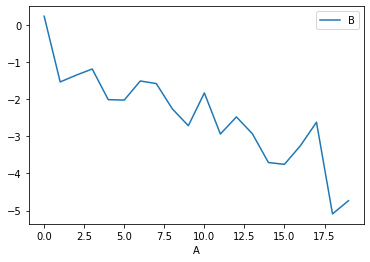

In [89]:
import numpy as np
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

#### Advanced Example

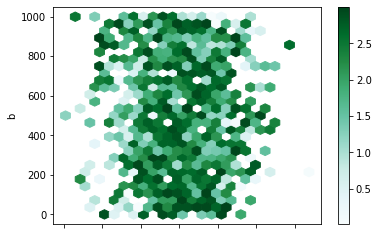

In [90]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=25)

## Data Wrangling 

### Tidy Data

- We need to make the data fit our needs
- Data wrangling is the process of doing this

### Goal:

1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

## Onto Part 2!